In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing # Import the California Housing dataset
from sklearn.preprocessing import StandardScaler # Good practice for scaling features

In [2]:
# 1. Load the California Housing Dataset
print("Loading California Housing dataset...")
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target
print("Dataset loaded.")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Feature names: {X.columns.tolist()}")
print(f"Target name: {housing.target_names[0]} (Median House Value)")

Loading California Housing dataset...
Dataset loaded.
Number of samples: 20640
Number of features: 8
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target name: MedHouseVal (Median House Value)


In [3]:
# Optional: Scale the features (often beneficial, though tree-based models are less sensitive)
# Scaling can help with convergence for some models, and it's generally good practice.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled # Keep as DataFrame for clarity in print statements

In [4]:
X_scaled

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [5]:
# 2. Split the data into training and testing sets
# We'll use the scaled data for training
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 16512 samples
Test set size: 4128 samples


In [6]:
# 3. Initialize the Base Estimator
# For AdaBoost Regression, a common choice for the base estimator is a DecisionTreeRegressor.
# We use a shallow tree to make it a "weak learner".
base_estimator = DecisionTreeRegressor(max_depth=6, random_state=42) # Increased depth slightly for a larger dataset

In [7]:

# 4. Initialize and Train the AdaBoostRegressor Model
# n_estimators: The maximum number of estimators at which boosting is terminated.
# learning_rate: Shrinks the contribution of each regressor.
# loss: The loss function to use when updating the weights after each boosting iteration.
#       'linear', 'square', 'exponential' are options. 'linear' is common for regression.
adaboost_regressor = AdaBoostRegressor(
    estimator=base_estimator,
    n_estimators=150,      # Number of weak learners, increased for complexity
    learning_rate=0.05,    # Contribution of each weak learner, decreased for moreestimators
    loss='linear',         # Loss function for updating weights
    random_state=42
)

In [8]:
print("\nTraining AdaBoost Regressor on California Housing dataset...")
adaboost_regressor.fit(X_train, y_train)
print("Training complete.")


Training AdaBoost Regressor on California Housing dataset...
Training complete.


In [9]:

# 5. Make Predictions on the test set
y_pred = adaboost_regressor.predict(X_test)

In [10]:
# 6. Evaluate the Model's Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:

print(f"\nMean Squared Error (MSE) on test set: ${mse:.4f}")
print(f"R-squared ($R^2$) score on test set: ${r2:.4f}")

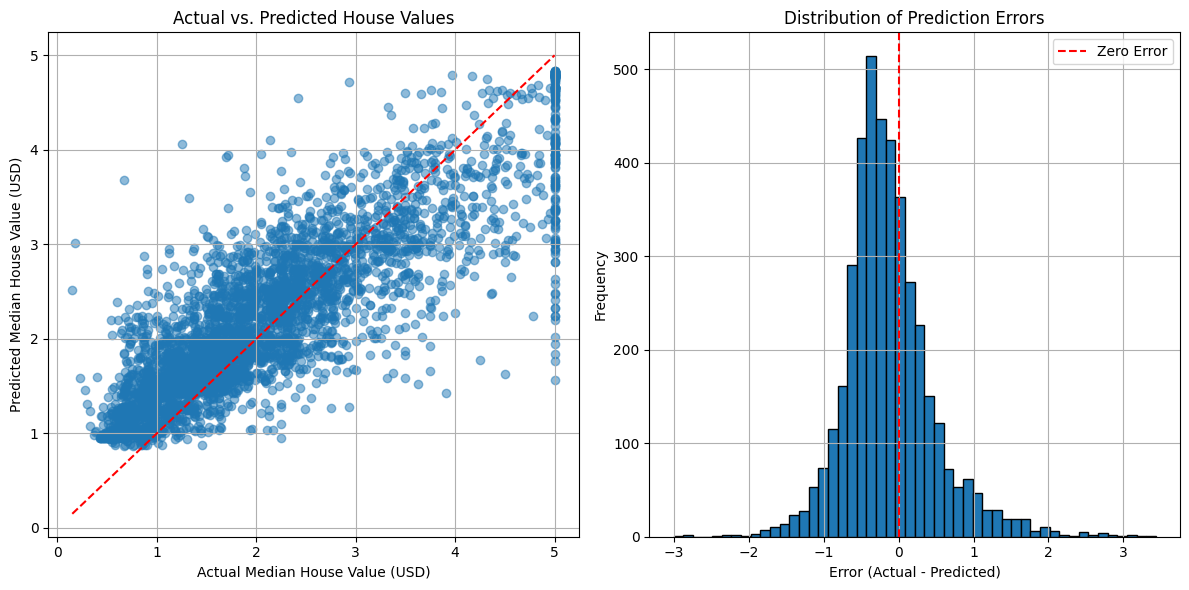

In [11]:
# 7. Visualize the Results (for multi-dimensional data)
# For multi-dimensional input, we can't plot X vs Y directly.
# Instead, we plot Actual vs Predicted values and prediction errors.

plt.figure(figsize=(12, 6))

# Plot Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--') # Ideal prediction line
plt.title("Actual vs. Predicted House Values")
plt.xlabel("Actual Median House Value (USD)")
plt.ylabel("Predicted Median House Value (USD)")
plt.grid(True)

# Plot Prediction Errors (Residuals)
errors = y_test - y_pred
plt.subplot(1, 2, 2)
plt.hist(errors, bins=50, edgecolor='black')
plt.axvline(0, color='r', linestyle='--', label='Zero Error')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [12]:


print("\n--- Insights ---")
print(f"The MSE of ${mse:.4f} indicates the average squared difference between the estimated values and the actual value.")
print(f"The R-squared ($R^2$) score of ${r2:.4f} indicates that approximately {r2*100:.2f}% of the variance in the target variable (median house value) can be explained by the model.")
print("A higher R-squared value (closer to 1) and a lower MSE (closer to 0) indicate a better fit.")


--- Insights ---
The MSE of $0.3855 indicates the average squared difference between the estimated values and the actual value.
The R-squared ($R^2$) score of $0.7058 indicates that approximately 70.58% of the variance in the target variable (median house value) can be explained by the model.
A higher R-squared value (closer to 1) and a lower MSE (closer to 0) indicate a better fit.
